In [1]:
%cd /content/drive/MyDrive/Kirill/Projects/Test_task_drinks

/content/drive/MyDrive/Kirill/Projects/Test_task_skysmart


In [2]:
!pip install split-folders

In [21]:
import os
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt
import splitfolders
from PIL import Image
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

data_origin_path = 'for_ml/'
data_dir = 'data/'

# Создание списка классов
name_class = listdir(data_origin_path)
name_class

['adrenaline_rush_citrus_buff-can-0.5',
 '7up_lajm_limon-pet-1.0',
 'jevervess_cola-bottle-0.25',
 'cool_cola-bottle-0.33',
 'e_on_citrus_punch-can-0.45',
 'pepsi_max-pet-2.0']

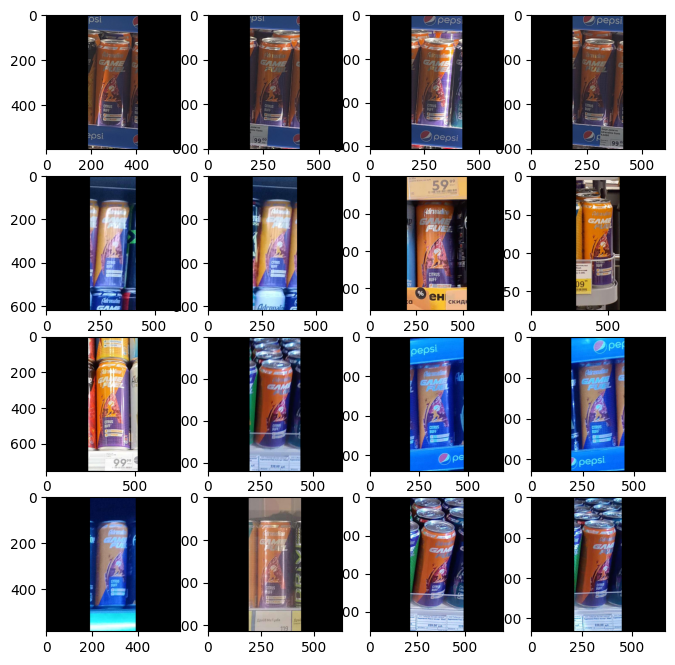

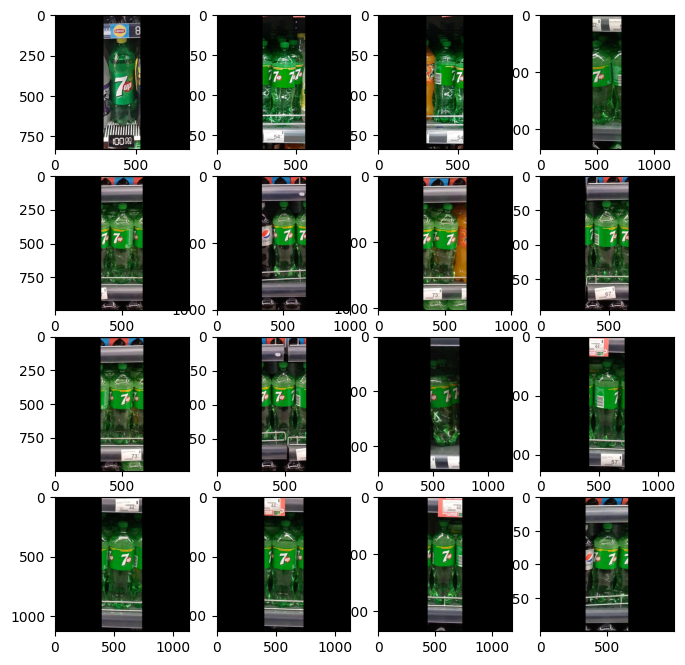

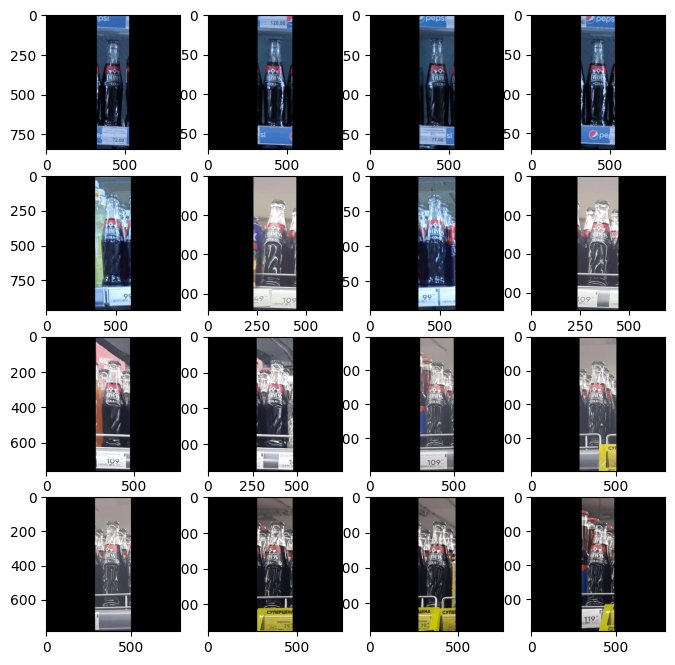

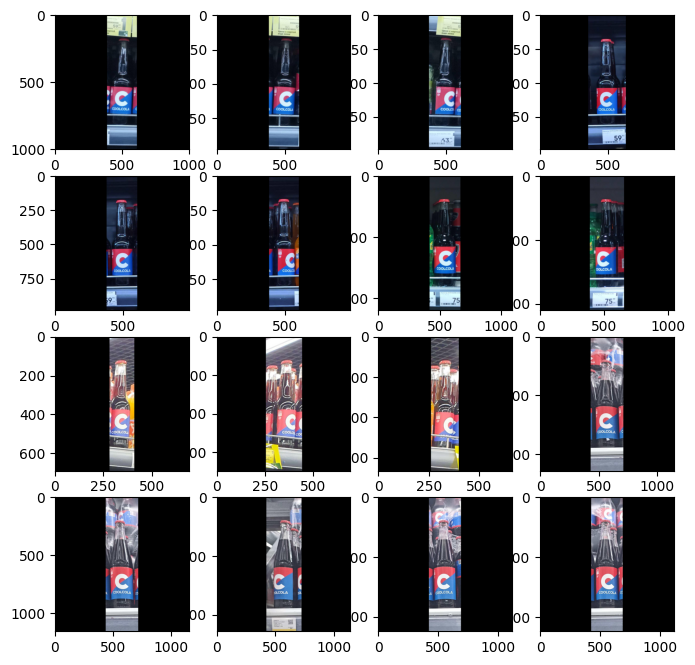

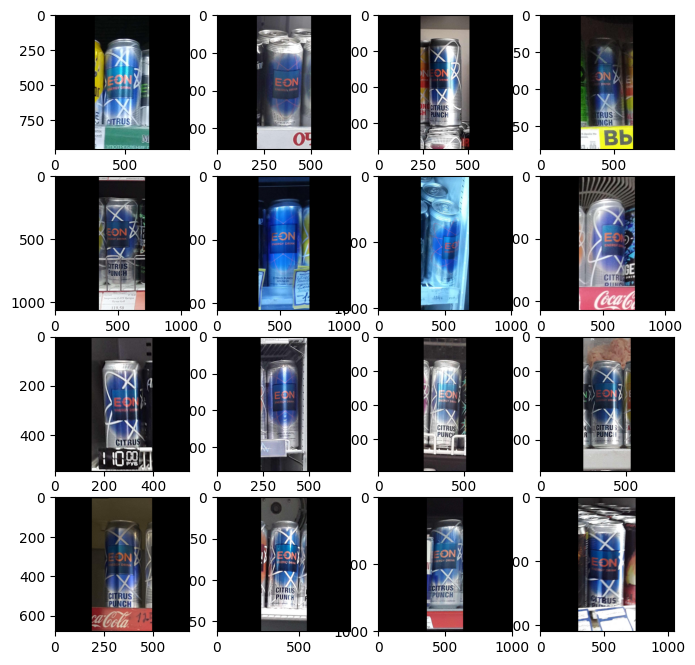

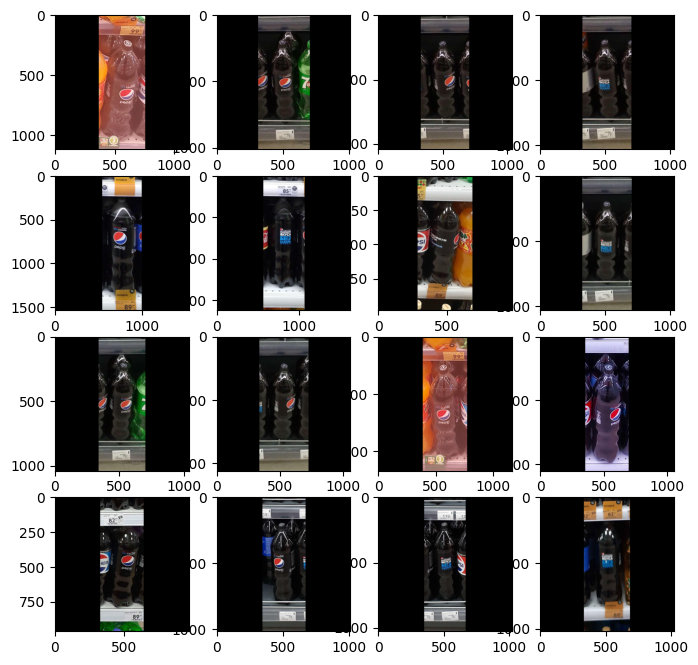

In [6]:
# Посмотрим на некоторые изображения в каждом классе
def show_data(dir, columns, rows):
  fig = plt.figure(figsize=(8, 8))
  name_imgs = listdir(dir)
  for i in range(1, columns*rows +1):
      img = Image.open(dir + name_imgs[i-1])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()


columns = 4
rows = 4
for name in name_class:
  show_data(data_origin_path + name + '/', columns, rows)

In [7]:
# Анализ распрделения
number_images = {n_c:len(listdir(data_origin_path + n_c)) for n_c in name_class}
number_images

{'adrenaline_rush_citrus_buff-can-0.5': 19,
 '7up_lajm_limon-pet-1.0': 105,
 'jevervess_cola-bottle-0.25': 117,
 'cool_cola-bottle-0.33': 102,
 'e_on_citrus_punch-can-0.45': 28,
 'pepsi_max-pet-2.0': 55}

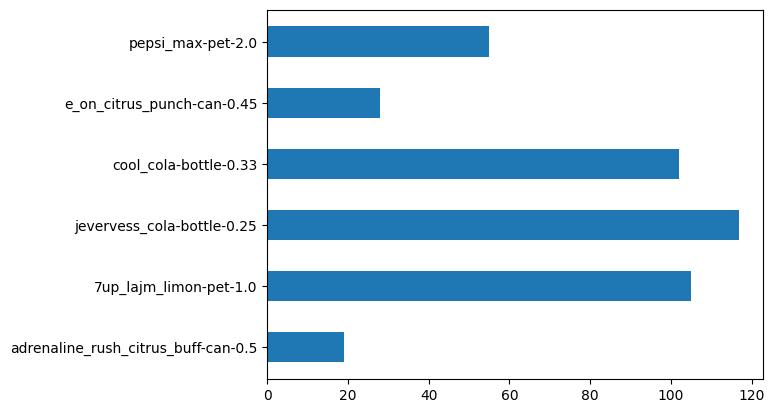

In [8]:
plt.barh(list(number_images.keys()), number_images.values(), height=0.5)
plt.show()

In [9]:
import splitfolders
# Разделение изображений на train и test и помещаем в дирректорию data
if not os.path.exists(data_dir):
  os.mkdir(data_dir)
splitfolders.ratio(data_origin_path, output=data_dir, seed=1337, ratio=(0.8, 0, 0.2))

Copying files: 426 files [00:50,  8.40 files/s]


In [10]:
# Анализ тестовой выборки
number_test_images = {n_c:len(listdir(data_dir + 'test/' + n_c)) for n_c in name_class}
number_test_images

{'adrenaline_rush_citrus_buff-can-0.5': 4,
 '7up_lajm_limon-pet-1.0': 21,
 'jevervess_cola-bottle-0.25': 24,
 'cool_cola-bottle-0.33': 21,
 'e_on_citrus_punch-can-0.45': 6,
 'pepsi_max-pet-2.0': 11}

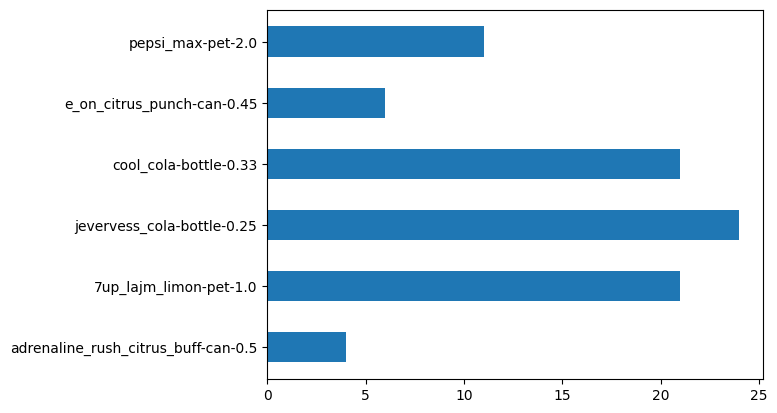

In [11]:
plt.barh(list(number_test_images.keys()), number_test_images.values(), height=0.5)
plt.show()

Поскольку распределение данных неравномерное и объектов классов adrenaline_rush_citrus_buff-can-0.5 и e_on_citrus_punch-can-0.45 мало, нужно провести аугментацию. В первую очередь добавим к этим классам в train и test реальные изображения собраные в интернете и вручную.

In [12]:
# Функуия для добавления к изображениям черных полос
def add_border(in_path, out_path):
  for file_name in listdir(in_path):
    virat_img = cv2.imread(in_path + file_name)
    l, w, _ = virat_img.shape
    border_size = (l - w) // 2
    borderoutput = cv2.copyMakeBorder(virat_img, 0, 0, border_size, border_size, cv2.BORDER_CONSTANT, None, value = 0)
    cv2.imwrite(out_path + file_name, borderoutput)


data_additional= 'data_additional/'
data_additional_orig = data_additional + 'origin/'
data_additional_border = data_additional + 'with_border/'

# Создаем дирректорию для измененных изображний если ее нет
if not os.path.exists(data_additional_border):
  os.mkdir(data_additional_border)

class_data_additional = listdir(data_additional_orig)

# Добавляем к изображениям всех классов полосы
for i in class_data_additional:
  if not os.path.exists(data_additional_border + i):
    os.mkdir(data_additional_border + i)
  add_border(data_additional_orig + i + '/', data_additional_border + i + '/')

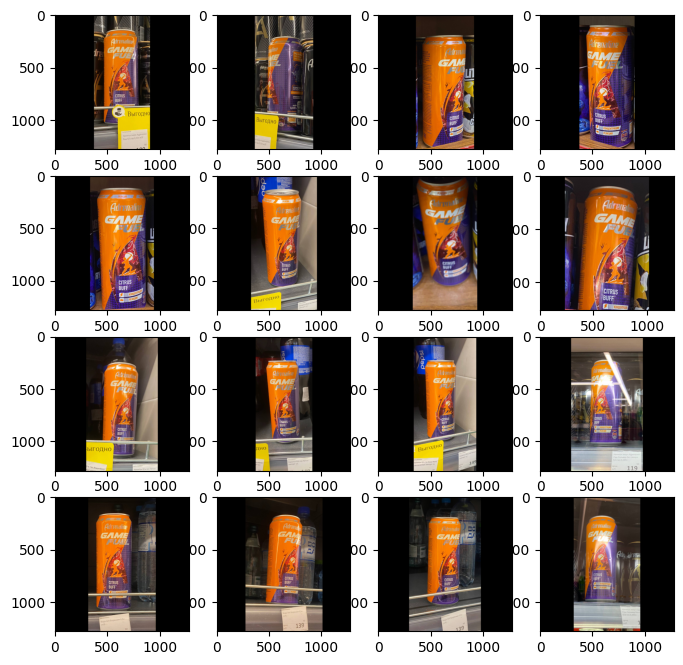

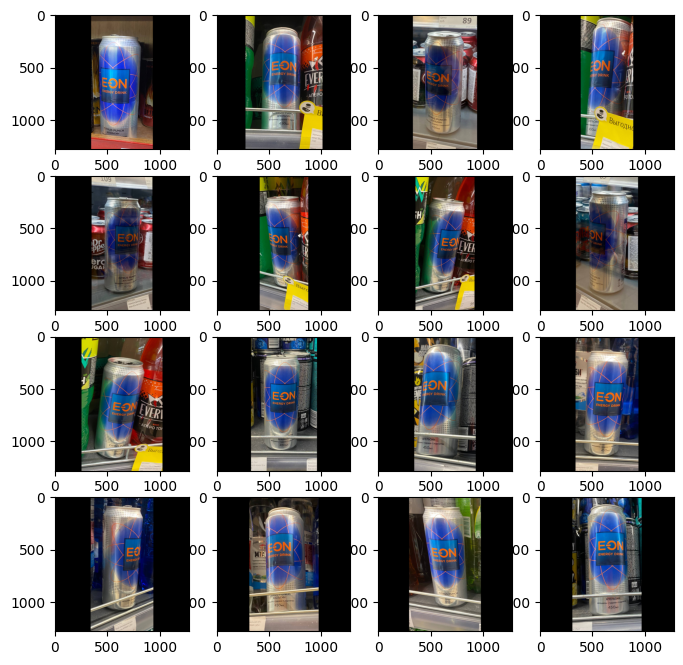

In [13]:
columns = 4
rows = 4
for name in class_data_additional:
  show_data(data_additional + 'with_border/' + name + '/', columns, rows)

In [14]:
import splitfolders
# Разделение дополнительных изображений на train и test
splitfolders.ratio(data_additional_border, output=data_dir, seed=1337, ratio=(0.8, 0, 0.2))

Copying files: 73 files [00:01, 39.30 files/s]


In [15]:
# Анализ тестовой выборки
number_test_images = {n_c:len(listdir(data_dir + 'test/' + n_c)) for n_c in name_class}
number_test_images

{'adrenaline_rush_citrus_buff-can-0.5': 12,
 '7up_lajm_limon-pet-1.0': 21,
 'jevervess_cola-bottle-0.25': 24,
 'cool_cola-bottle-0.33': 21,
 'e_on_citrus_punch-can-0.45': 14,
 'pepsi_max-pet-2.0': 11}

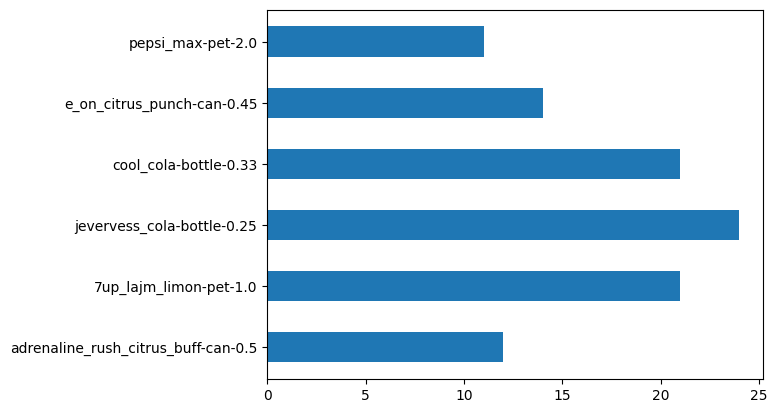

In [16]:
plt.barh(list(number_test_images.keys()), number_test_images.values(), height=0.5)
plt.show()

In [17]:
# Анализ тренировочной выборки
number_train_images = {n_c:len(listdir(data_dir + 'train/' + n_c)) for n_c in name_class}
number_train_images

{'adrenaline_rush_citrus_buff-can-0.5': 44,
 '7up_lajm_limon-pet-1.0': 84,
 'jevervess_cola-bottle-0.25': 93,
 'cool_cola-bottle-0.33': 81,
 'e_on_citrus_punch-can-0.45': 50,
 'pepsi_max-pet-2.0': 44}

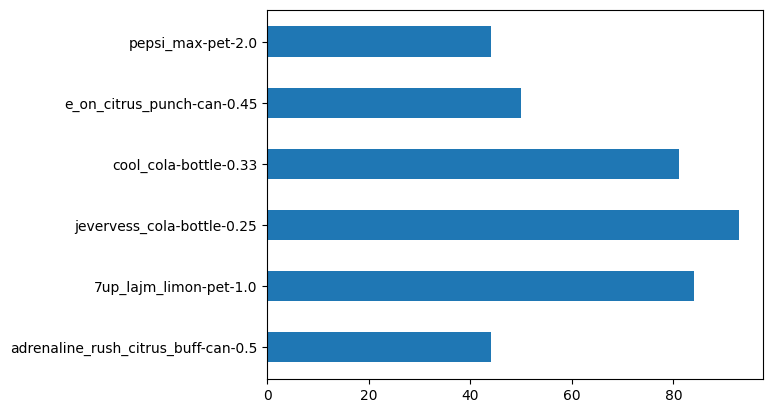

In [18]:
plt.barh(list(number_train_images.keys()), number_train_images.values(), height=0.5)
plt.show()

В дальнейшем тестовую выборку оставим неизменной, а тренировочную увеличим добавив синтетические данные

In [19]:
!pip install imagecorruptions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [20]:
print(number_train_images)
print(name_class)

{'adrenaline_rush_citrus_buff-can-0.5': 44, '7up_lajm_limon-pet-1.0': 84, 'jevervess_cola-bottle-0.25': 93, 'cool_cola-bottle-0.33': 81, 'e_on_citrus_punch-can-0.45': 50, 'pepsi_max-pet-2.0': 44}
['adrenaline_rush_citrus_buff-can-0.5', '7up_lajm_limon-pet-1.0', 'jevervess_cola-bottle-0.25', 'cool_cola-bottle-0.33', 'e_on_citrus_punch-can-0.45', 'pepsi_max-pet-2.0']


In [22]:
import imgaug.augmenters as iaa

#Функция для создания дод. изображений
def create_synthetic_img(in_path, out_path, augmentation, coeff_increase=1):

  images_name = listdir(in_path)

  for i, i_m in enumerate(images_name):

      img = cv2.imread(in_path + i_m)

      augmented_images = augmentation(images=np.vstack([[img]]*coeff_increase))
      for j, aug_img in enumerate(augmented_images):
        cv2.imwrite(out_path + '/' + str(i) + '_' + str(j) + '.png', aug_img)



#Трансформер для синтетических изображения
augmentation = iaa.Sequential([
    iaa.Affine(translate_percent={"x": (-0.3, 0.3), "y": (-0.1, 0.1)}, #Сдвиг изображений
               rotate=(-45, 45),                                       #Поворот изображений
               scale=(0.8, 1.3)),                                      #Маштабирование изобоажений
    iaa.Multiply((0.7, 1.3)),                                          #Изменение уровня яркости
    iaa.LinearContrast((0.6, 1.4)),                                    #Регуляризация контраста
    iaa.Sometimes(0.2,
        iaa.GaussianBlur((0.0, 3.0)),                                  #Гауссовское размытие
        iaa.imgcorruptlike.GaussianNoise((1, 5)))])                    #Гауссовский шум


#Приблизительное кол-во изображений в обном классе
number_one_class_img = 200

data_synthetic_path = 'synthetic_data/'

if not os.path.exists(data_synthetic_path):
    os.mkdir(data_synthetic_path)

for n_c, count_img in number_train_images.items():

  if not os.path.exists(data_synthetic_path + n_c):
    os.mkdir(data_synthetic_path + n_c)

  coeff_aug = (number_one_class_img - count_img) // count_img

  create_synthetic_img(data_dir + 'train/' + n_c + '/', data_synthetic_path + n_c, augmentation, coeff_increase=coeff_aug)

In [23]:
#Перенос синтетических данных в data
splitfolders.ratio(data_synthetic_path, output=data_dir, seed=1337, ratio=(1, 0, 0))

Copying files: 672 files [00:32, 20.62 files/s]


In [24]:
# Анализ тренировочной выборки
number_train_images = {n_c:len(listdir(data_dir + 'train/' + n_c)) for n_c in name_class}
number_train_images

{'adrenaline_rush_citrus_buff-can-0.5': 176,
 '7up_lajm_limon-pet-1.0': 168,
 'jevervess_cola-bottle-0.25': 186,
 'cool_cola-bottle-0.33': 162,
 'e_on_citrus_punch-can-0.45': 200,
 'pepsi_max-pet-2.0': 176}

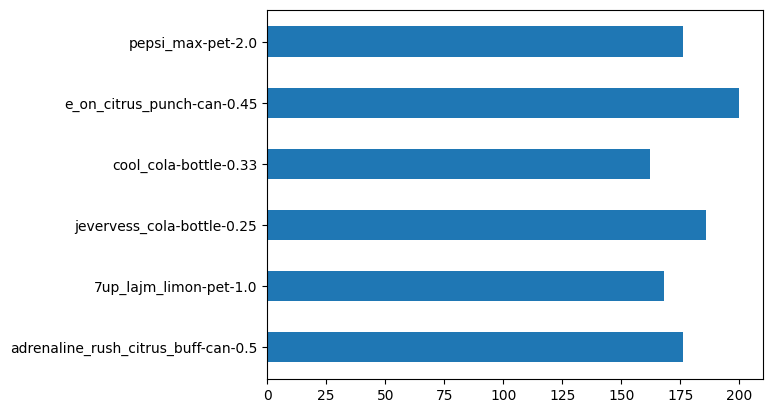

In [25]:
plt.barh(list(number_train_images.keys()), number_train_images.values(), height=0.5)
plt.show()

In [27]:
import pandas as pd


#Создание csv
def build_dataframe(directory_string):

  df = pd.DataFrame(columns=['Path', 'Class', 'Label'])
  a = []
  for i, n_c in enumerate(os.listdir(directory_string)):
    df_t = [[directory_string + n_c + '/' + img, n_c, i] for img in os.listdir(directory_string + n_c)]
    df = pd.concat([df, pd.DataFrame(df_t, columns=['Path', 'Class', 'Label'])], ignore_index=True)
  return df


build_dataframe(data_dir + 'train/').to_csv(data_dir +'train.csv', index=False)
build_dataframe(data_dir + 'test/').to_csv(data_dir + 'test.csv', index=False)